In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv(r"E:\Pyhton code\Data Sets\bank_transactions_data_2.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [6]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [13]:
df=df.fillna(value=0,inplace=True)

In [7]:
df=df.drop_duplicates()

Analysis

In [19]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [20]:
df.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

In [23]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'],errors='coerce')

In [ ]:

df.dtypes

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate            object
DateOnly                        period[M]
dtype: object

In [29]:
grouped = df.groupby('TransactionDate')['TransactionAmount'].sum().reset_index()

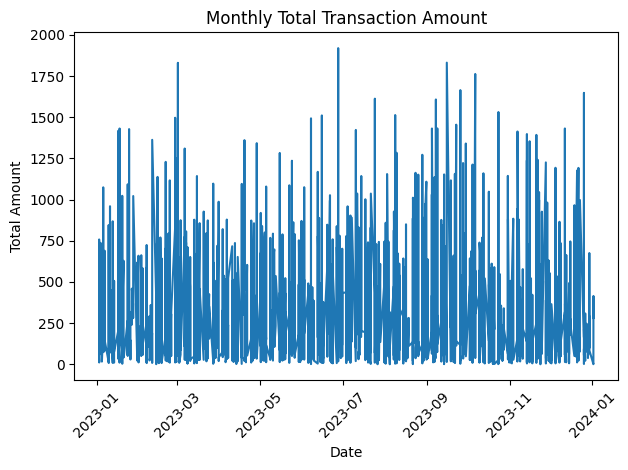

In [32]:
plt.Figure(figsize=(12,6))
sns.lineplot(data=grouped, x='TransactionDate',y='TransactionAmount')
plt.title('Monthly Total Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


from above graph we can see, there are frequent spikes in heavy transaction's, and the avrage transaction range is between 750-1250. And the high trnsaction are found in 3,7,9 month in 2023 and jan of 2024   

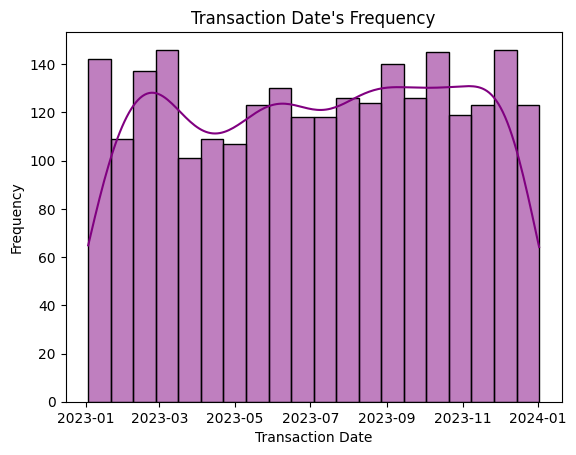

In [34]:
sns.histplot(df['TransactionDate'],kde=True,bins=20,color='Purple')
plt.title("Transaction Date's Frequency")
plt.xlabel("Transaction Date")
plt.ylabel("Frequency")
plt.show()

From above chart we can get that the transaction frequency is high in march of 2023 and a avrage frequency range is between 100-120

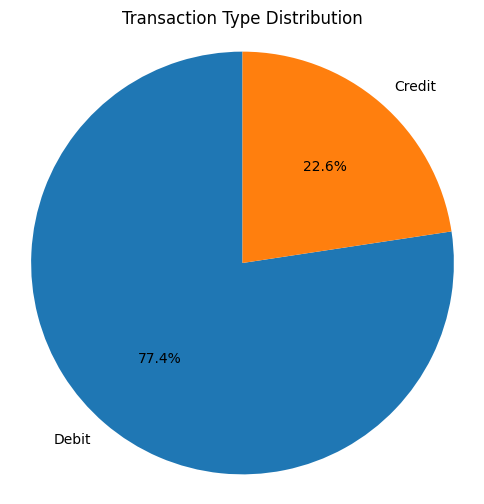

In [35]:
type_counts = df['TransactionType'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(type_counts.values, labels=type_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Transaction Type Distribution')
plt.axis('equal')
plt.show()

From above pie chart we can understand that most people have done their transaction from debit account( 77.4) and less that 30% people hav euse credit card for transaction(22.6%)

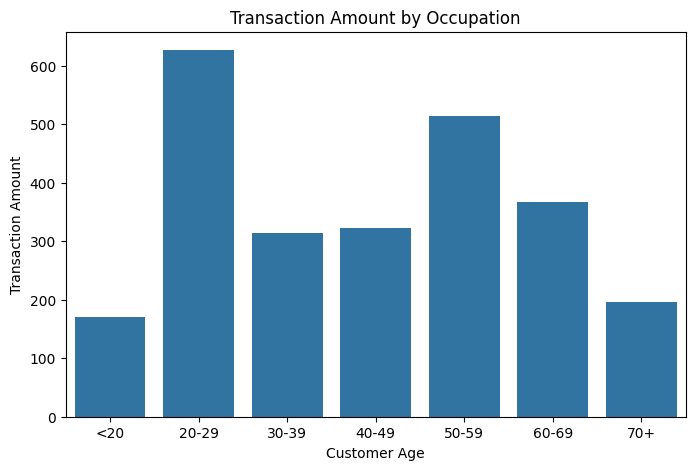

In [42]:
bins= [0,20,30,40,50,60,70,100]
labels = ['<20','20-29','30-39','40-49','50-59','60-69','70+']
df["AgeGroup"] = pd.cut(df['CustomerAge'], bins=bins, labels=labels)
age_couns =  df['AgeGroup'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=age_couns.index,y=age_couns.values)
plt.title('Transaction Amount by Occupation')
plt.xlabel("Customer Age")
plt.ylabel("Transaction Amount")
plt.show()


From above bar chart we can get that, youth(20-29) are doing high transaction as compared to elder people(30-50), also most people of age group 50-59 have high transaction report after youth's, Lowest transaction are done by adult's(less than 20)

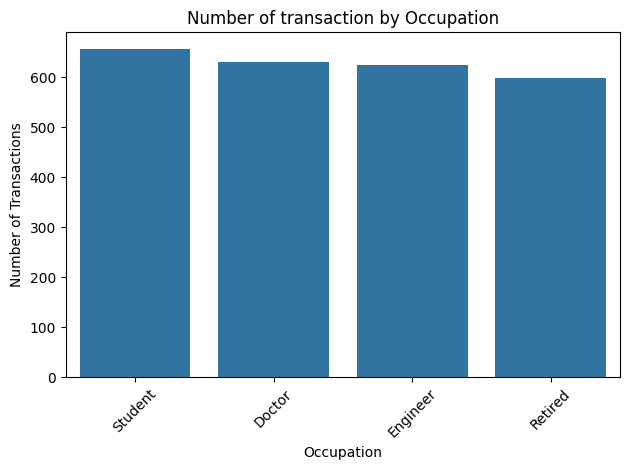

In [44]:
plt.Figure(figsize=(10,5))
sns.countplot(data=df, x='CustomerOccupation',order=df['CustomerOccupation'].value_counts().index)
plt.title("Number of transaction by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From count plot, we get to understand all type's of occupation have done nearly same number of transaction(between 500-600). Maximum transaction are done by student's(above 600), then followed by docto'r and engineer's( equal to 600), and at last our retired people(less than 600)

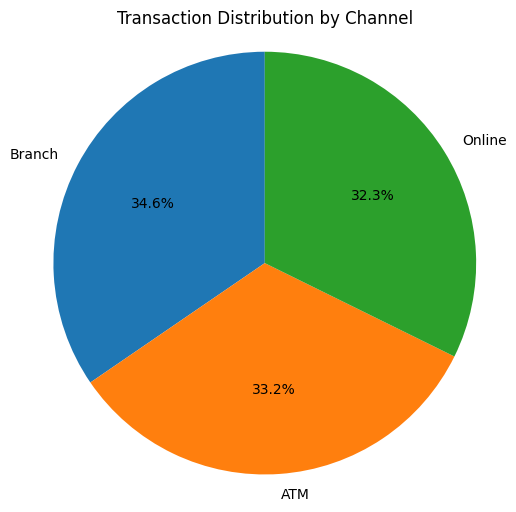

In [45]:
channel_count = df['Channel'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(channel_count.values, labels=channel_count.index, autopct='%1.1f%%',startangle=90)
plt.title('Transaction Distribution by Channel')
plt.axis('equal')
plt.show()


From above pie chart we can see, all three channel are equally used for transaction(average is 30), in which direct branch approach is been is more used as compared to oher channel's which areonline & ATM

Overall conclusion is that, from above high transaction are been seen in march, september month, and those transaction are mostly done by youth's(age between 20-30), which proof we get from count plot, where max transaction's are done by student's. This is commonly seen, in every country max transaction are done by youth's